In [1]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats

sns.set()

# Load results

To regenerate the benchmarking results from scratch, follow the instructions in README to set up data and submit all benchmarking jobs.

Alternatively, if you do not wish to rerun all experiments, but only want to generate the plots, we also provide the results we used. Simply extract the results from the provided archive file under the project root directory by

```
$ tar -xzvf results.tar.gz
```

In [2]:
dfs = []
for i in glob.glob("../results/*.json"):
    name = i.split("/")[-1].split(".json")[0]
    new_df = pd.read_json(i)
    new_df["network"], new_df["label"], new_df["model"], new_df["rep"] = name.split("_")
    dfs.append(new_df)
df = pd.concat(dfs)
df

,task_name,train_log2pr,val_log2pr,test_log2pr,train_auroc,val_auroc,test_auroc,network,label,model,rep
0,DOID:10124,0.004545,-0.242939,-0.074184,0.494854,0.410504,0.447248,humannet,disgenet,gat,2
1,DOID:76,0.072780,0.341915,0.076670,0.495112,0.555295,0.477872,humannet,disgenet,gat,2
2,DOID:26,-0.098731,0.367891,0.094019,0.474564,0.516022,0.481628,humannet,disgenet,gat,2
3,DOID:0060032,-0.096801,0.047014,0.119272,0.490923,0.536376,0.490060,humannet,disgenet,gat,2
4,DOID:0060158,-0.045253,0.381350,0.581044,0.453043,0.462096,0.458034,humannet,disgenet,gat,2
...,...,...,...,...,...,...,...,...,...,...,...
118,DOID:9834,2.892218,1.088101,1.157919,0.831366,0.712271,0.661645,string,disgenet,n2v-svm,2
119,DOID:6419,4.257474,1.947520,0.194243,0.913556,0.658296,0.511282,string,disgenet,n2v-svm,2
120,DOID:8534,2.328611,1.184670,1.049223,0.819537,0.660646,0.692394,string,disgenet,n2v-svm,2
121,DOID:9370,3.412577,0.906294,0.827968,0.836918,0.564113,0.648607,string,disgenet,n2v-svm,2


In [3]:
networks = [
    "biogrid",
    "humannet",
    "string",
]
labels = ["disgenet", "gobp"]
models = [
    "adj-logreg",
    "adj-svm",
    "n2v-logreg",
    "n2v-svm",
    "gin",
    "gcn",
    "graphsage",
    "gat",
]

# Metric to plot
metric = "test_log2pr"

## Compare model performance across datasets

In [4]:
table = (
    df
    .groupby(["label", "network", "model"])
    .mean()[metric]
    .unstack("model")[models]
)

table.index = table.index.map("-".join)
table.index.name = table.columns.name = None
table.style.highlight_max(color="lightgreen", axis=1)

,adj-logreg,adj-svm,n2v-logreg,n2v-svm,gin,gcn,graphsage,gat
disgenet-biogrid,0.773919,0.641985,0.741781,0.678801,0.534996,0.489414,0.374360,0.344050
disgenet-humannet,1.898492,1.771644,1.669344,1.594309,1.156724,0.905231,0.592143,0.381305
disgenet-string,2.603984,2.596474,2.032428,2.119376,1.284286,1.115220,0.723065,nan
gobp-biogrid,1.686189,1.463769,1.845561,1.710385,0.870020,0.940500,0.764127,0.317502
gobp-humannet,3.412612,3.271603,3.447859,3.331931,2.260294,1.780476,1.168002,0.369709
gobp-string,3.481325,3.470233,3.354543,3.511456,2.305623,1.914556,1.606290,nan


In [5]:
# Standard deviation across repetitions (each reduced via mean)
(
    df
    .groupby(["label", "network", "model", "rep"])
    .mean()
    .groupby(["label", "network", "model"])
    .std()[metric]
    .unstack("model")[models]
)

model              adj-logreg   adj-svm  n2v-logreg   n2v-svm       gin  \
label    network                                                          
disgenet biogrid          0.0  0.000002    0.038150  0.036046  0.033146   
         humannet         0.0  0.000001    0.043889  0.029016  0.084814   
         string           0.0  0.000001    0.035210  0.027848  0.046119   
gobp     biogrid          0.0  0.000004    0.035232  0.038060  0.037146   
         humannet         0.0  0.000003    0.021538  0.036137  0.052921   
         string           0.0  0.000010    0.019607  0.036202  0.085022   

model                   gcn  graphsage       gat  
label    network                                  
disgenet biogrid   0.043964   0.034955  0.065935  
         humannet  0.074305   0.061607  0.034839  
         string    0.029505   0.120805       NaN  
gobp     biogrid   0.036594   0.022763  0.027924  
         humannet  0.078306   0.125034  0.026063  
         string    0.121557   0.221035       NaN

## Distribution of performance per task for a particular dataset

In [6]:
network = "humannet"
label = "disgenet"

summary_df = (
    df
    .groupby(
        ["task_name", "network", "label", "model"],
        as_index=False,
    )
    .mean()
    .query("network == @network & label == @label")
)
summary_df

,task_name,network,label,model,train_log2pr,val_log2pr,test_log2pr,train_auroc,val_auroc,test_auroc
8,DOID:0050117,humannet,disgenet,adj-logreg,4.241086,3.916113,4.534222,1.000000,0.751801,0.780205
9,DOID:0050117,humannet,disgenet,adj-svm,4.241086,3.823437,4.535368,1.000000,0.751057,0.785740
10,DOID:0050117,humannet,disgenet,gat,0.297951,0.458779,0.302387,0.534841,0.531273,0.522365
11,DOID:0050117,humannet,disgenet,gcn,1.820467,1.673037,1.453464,0.744224,0.654558,0.690313
12,DOID:0050117,humannet,disgenet,gin,3.016837,2.334028,3.591089,0.860104,0.649359,0.694398
...,...,...,...,...,...,...,...,...,...,...
2817,DOID:9993,humannet,disgenet,gcn,3.751723,3.017771,3.309580,0.845332,0.745859,0.556791
2818,DOID:9993,humannet,disgenet,gin,4.783028,2.768304,3.878911,0.953608,0.713008,0.691559
2819,DOID:9993,humannet,disgenet,graphsage,4.175170,3.277242,1.627762,0.875964,0.736152,0.585724
2820,DOID:9993,humannet,disgenet,n2v-logreg,4.623920,3.440205,3.469215,0.959948,0.803470,0.693181


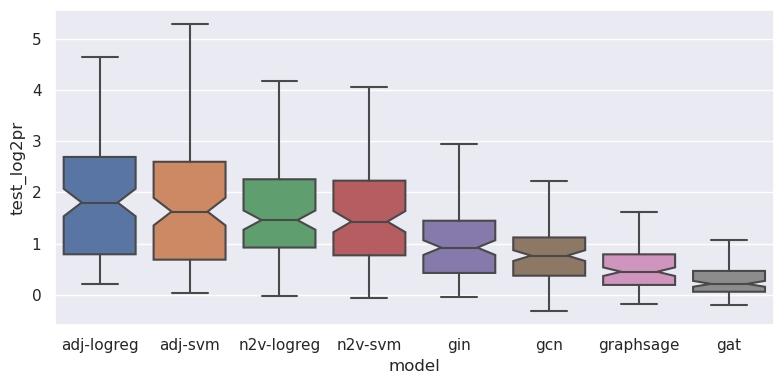

In [7]:
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=summary_df,
    x="model",
    y=metric,
    order=models,
    notch=True,
    showfliers=False,
)
plt.tight_layout()
plt.show()

In [8]:
table = summary_df.pivot(index="task_name", columns="model", values=metric)
table

model,adj-logreg,adj-svm,gat,gcn,gin,graphsage,n2v-logreg,n2v-svm
task_name,,,,,,,,
DOID:0050117,4.534222,4.535368,0.302387,1.453464,3.591089,0.472657,4.853740,4.845606
DOID:0050453,4.336055,4.368982,0.150165,0.972686,2.164441,-0.061131,2.131783,2.318272
DOID:0050567,1.143653,0.641946,-0.033113,0.465764,0.879071,0.194514,1.100619,1.200053
DOID:0050615,0.800005,0.803527,0.182167,0.335233,0.673395,0.278022,1.882977,1.856286
DOID:0050621,0.798531,0.455129,0.237876,0.319501,1.003506,0.552551,0.025213,0.160578
...,...,...,...,...,...,...,...,...
DOID:9834,2.025048,1.832410,0.059048,1.057582,1.356837,0.543443,1.282745,1.187912
DOID:9835,1.946378,1.719785,0.045719,0.692218,1.079872,0.395110,1.216856,1.271952
DOID:9840,2.397226,2.279186,0.112305,1.647684,2.530879,0.791483,2.436752,2.029474


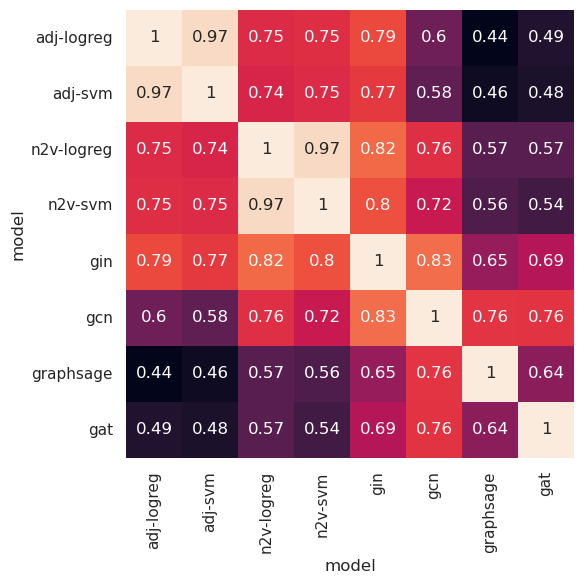

In [9]:
# Correlation of task-specific performance between models
plt.figure(figsize=(6, 6))
sns.heatmap(
    table[models].corr(),
    annot=True,
    cbar=False,
)
plt.tight_layout()
plt.show()

## Given a model and the tasks of interest, which network to use

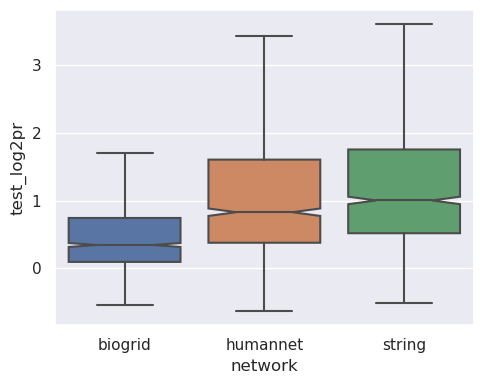

In [10]:
model = "gin"
label = "disgenet"
metric = "test_log2pr"

plt.figure(figsize=(5, 4))
sns.boxplot(
    data=(
        df
        .groupby(["label", "model"])
        .get_group((label, model))
    ),
    x="network",
    order=networks,
    y=metric,
    notch=True,
    showfliers=False,
)
plt.tight_layout()
plt.show()

## No universally optimal model

In [11]:
network = "humannet"
label = "disgenet"

sub_df = df.query("network == @network & label == @label")

In [12]:
mdl1 = "adj-logreg"
mdl2 = "gcn"

score_lst = []
for task, group_task in sub_df.groupby("task_name"):
    group_task_mdl = group_task.groupby("model")
    
    mdl1_scores = group_task_mdl.get_group(mdl1)[metric].values
    mdl2_scores = group_task_mdl.get_group(mdl2)[metric].values
    
    diff_score = mdl1_scores.mean() - mdl2_scores.mean()
    pval = scipy.stats.ttest_ind(mdl1_scores, mdl2_scores)[1]
    
    score_lst.append((task, mdl1_scores.mean(), mdl2_scores.mean(), diff_score, pval))
    
pd.DataFrame(score_lst).sort_values(3).rename(
    columns={
        0: "task_name",
        1: mdl1,
        2: mdl2,
        3: f"{mdl1} - {mdl2}",
        4: "p-value",
    }
)

,task_name,adj-logreg,gcn,adj-logreg - gcn,p-value
43,DOID:12215,1.139275,2.305145,-1.165870,9.171324e-07
64,DOID:1934,0.504471,1.524574,-1.020103,1.871173e-05
50,DOID:1426,0.373629,1.175292,-0.801664,8.181133e-02
49,DOID:13832,0.396298,0.983882,-0.587585,4.870882e-08
91,DOID:480,0.398559,0.973049,-0.574490,5.255507e-06
...,...,...,...,...,...
114,DOID:9500,3.706410,0.618835,3.087575,4.201089e-18
110,DOID:9252,5.858867,2.600130,3.258737,1.779444e-13
87,DOID:4079,3.229803,-0.083708,3.313512,1.185873e-21
108,DOID:8501,5.623820,2.284376,3.339444,3.771055e-09
